## Missouri Flood Analysis

Parts of Missouri experienced historic flooding recently.  Some locations saw as much as 11 inches of rainfall. This notebook  performs flood classification followed by impact assessment.

In [2]:
from arcgis import GIS
from arcgis.mapping import MapImageLayer

In [3]:
gis = GIS(profile="idtportal", verify_cert=False)

### Visualize the extent of damage

In [10]:
def side_by_side(address):
    pass

In [15]:
from ipywidgets import *

def side_by_side(address):
    postflood = MapImageLayer('https://tiles.arcgis.com/tiles/DO4gTjwJVIJ7O9Ca/arcgis/rest/services/Missouri_Flood_Imagery/MapServer')
    normal =  MapImageLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer')
    location = geocode(address)[0]
    satmap1 = gis.map(location)
    satmap1.add_layer(normal)

    satmap2 = gis.map(location)
    #satmap2.add_layer(postflood)
    satmap2.add_layer({'type':'ArcGISTiledMapServiceLayer', 'url':'https://tiles.arcgis.com/tiles/DO4gTjwJVIJ7O9Ca/arcgis/rest/services/Missouri_Flood_Imagery/MapServer'})

    satmap1.layout=Layout(flex='1 1', padding='6px', height='420px')
    satmap2.layout=Layout(flex='1 1', padding='6px', height='420px')

    box = HBox([satmap1, satmap2])
    return box

## Visualize damage

In [11]:
side_by_side('Eureka High School, Eureka, MO 63025')

<img src="./img/eureka-high-school.png"/>

### Load pre and post flood layers

In [4]:
missouri_pre_flood_item = gis.content.search("title:MissouriFloodsPre", "Imagery Layer")[0]
missouri_pre_flood =  missouri_pre_flood_item.layers[0]

<img src="./img/imagery_pre_item.jpg" />

In [5]:
missouri_post_flood_item = gis.content.search("title:MissouriFloodsPost", "Imagery Layer")[0]
missouri_post_flood =  missouri_post_flood_item.layers[0]

<img src="./img/imagery_post_item.jpg" />

## Flood Classification 

#### Train the Classifier 

In [6]:
import json
from arcgis.features import FeatureSet

with open("full_fc.json", "r") as training_sample_file:
    training_samples = training_sample_file.read() 

fs = FeatureSet.from_json(training_samples)

In [9]:
map_widget = gis.map()
map_widget.center = [38.541585,-90.488005]
map_widget.zoom = 15
map_widget.add_layer(missouri_post_flood)
map_widget

<img src="./img/missouri-floods-training-map.jpg" />

In [14]:
symbol = {
    "type" : "simple-fill",
    "outline" : {"color": [85, 255, 0, 1]},
    "color": [255, 0, 0, 0.57]
}
map_widget.draw(fs, symbol=symbol)

#### Perform Classification 

In [41]:
from arcgis.raster.analytics import train_classifier

classifier_definition = train_classifier(input_raster=missouri_post_flood, 
                                         input_training_sample_json=training_samples, 
                                         classifier_parameters={"method":"svm", 
                                                                "params":{"maxSampleClass":1000}}, 
                                         gis=gis)

In [19]:
from arcgis.raster.functions import classify

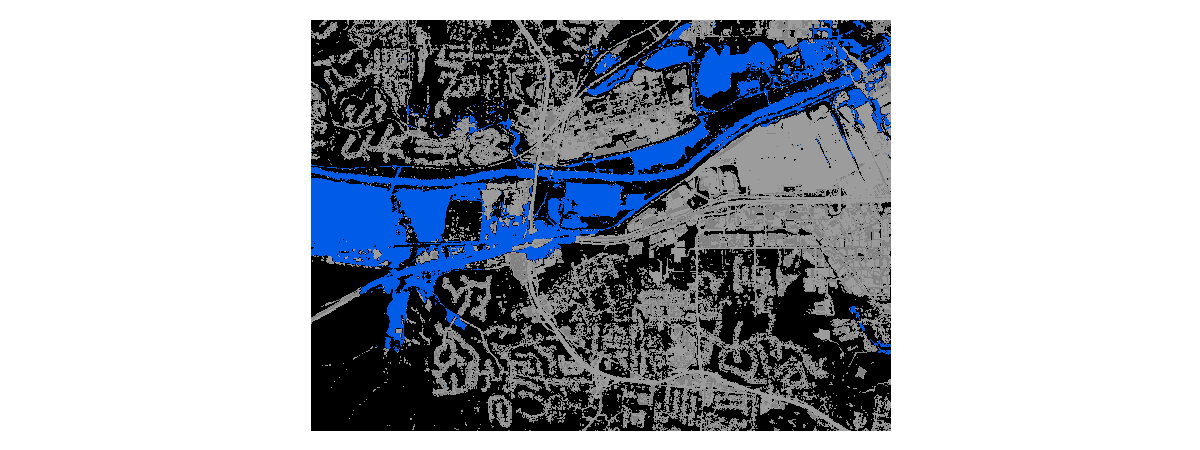

In [20]:
classified_output = classify(raster1=missouri_post_flood, 
                             classifier_definition=classifier_definition)
classified_output